#**Back Propagation**

#Step 1 : import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics


#Step 2 :Load the Dataset
###Upload palmer penguins dataset " / LAB/ Dataset/ penguins.csv





In [2]:
# Loading dataset
df = pd.read_csv('Datasets/penguins.csv')

for i in df.isna().sum().index:
    df[i].fillna(df[i].mode()[0], inplace=True)

# df = df.dropna()
# Dividing the dataset into target variable and features
X = df.drop(['sex'], axis=1)
y = df['sex']

In [3]:
le = LabelEncoder()

for i in X.select_dtypes(include=['object']).columns:
    X[i] = le.fit_transform(X[i])
    
y = le.fit_transform(y)

In [4]:
standard = StandardScaler()
X = standard.fit_transform(X)

#Step 3: Split Dataset in Training and Testing


In [5]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

# Step 4 : initializing the hyperparameters

In [6]:
learning_rate = 0.1
iterations = 5000
N = y_train.size

# Input features
input_size = 6

# Hidden layers
hidden_size = 2

# Output layer
output_size = 2


#Step 5 : Initialize Weights

In [7]:
np.random.seed(10)

# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))


#Step 6 : mean squared error, accuracy and sigmoid.



In [8]:
# Helper functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_true_one_hot = np.eye(output_size)[y_true]

    # Reshape y_true_one_hot to match y_pred shape
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)

    # Compute the mean squared error between y_pred and y_true_reshaped
    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)

    return error

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
    return acc.mean()

results = pd.DataFrame(columns=["mse", "accuracy"])


#Step 7 : Building the Backpropogation Model in Python
###We will create a for loop for a given number of iterations and will update the weights in each iteration. The model will go through three phases feedforward propagation, the error calculation phase, and the backpropagation phase.


In [9]:
# Training loop

for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


/var/folders/c1/9m9gfrj553l8956nyk7q8gw40000gn/T/ipykernel_87479/409490985.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


# Step 8 : Plot the mean squared error and accuracy using the pandas plot() function.



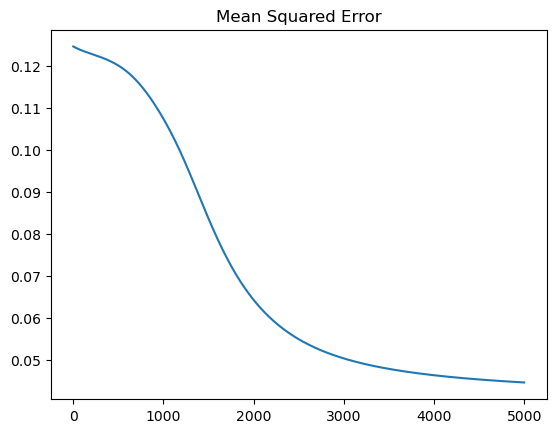

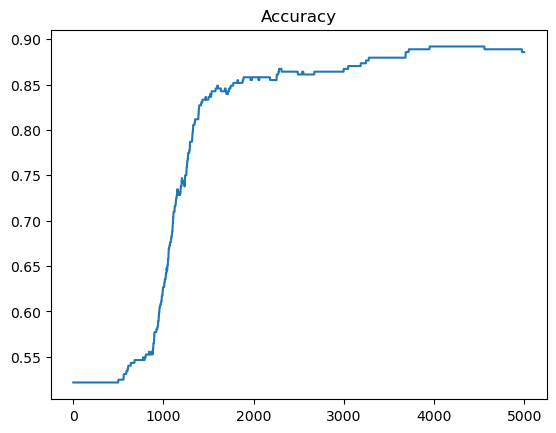

In [10]:
results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()

###Now we will calculate the accuracy of the model.



In [11]:
# Test the model
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))


Test accuracy: 0.95


#**Well Done :)**